In [181]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
from sklearn import svm

In [182]:
def Gaussian_Kernel(X1, X2, sigma):
    return np.exp(np.sum((X1 - X2) * (X1 - X2)) / (-2 * np.power(sigma, 2)))

#测试Gaussian_Kernel函数
# X1 = np.array([1, 2, 1])
# X2 = np.array([0, 4, -1])
# sigma = 2
# hah = Gaussian_Kernel(X1, X2, sigma)
# print(hah)

加载data2的数据

In [183]:
path2 = 'data/ex6data2.mat'
data2_origin = sio.loadmat(path2)
data2 = pd.DataFrame(data2_origin['X'], columns=['X1', 'X2'])
data2['Y'] = data2_origin['y']
data2.head()

,X1,X2,Y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


画散点图

In [184]:
def plot_scatter(data):
    negative = data[data['Y'].isin([0])]
    positive = data[data['Y'].isin([1])]
    fig, ax = plt.subplots(figsize = (12,8))
    ax.scatter(negative['X1'], negative['X2'], c= 'yellow', marker= 'o', label= 'negative example')
    ax.scatter(positive['X1'], positive['X2'], c= 'black', marker= '+', label= 'positive example')
    plt.legend()

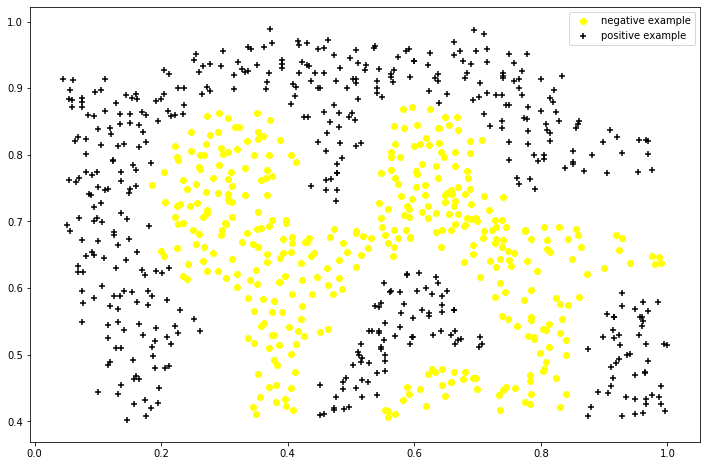

In [185]:
plot_scatter(data2)
plt.show()

进行高斯核的SVM训练并画出核函数


In [186]:
def plot_boundary(model, data):
    model.fit(data[['X1', 'X2']], data['Y'])
    model.score(data[['X1', 'X2']], data['Y'])
    u = np.linspace(np.min(data['X1']), np.max(data['X1']), 100).T
    v = np.linspace(np.min(data['X2']), np.max(data['X2']), 100).T
    X1, X2 = np.meshgrid(u, v)
    y_predict = np.zeros(X1.shape)
    for i in range(X1.shape[1]):
        temp = np.array([X1[:, i], X2[:, i]]).T
        temp = np.matrix(temp)
        # print(temp.shape)
        y_predict[:, i] = model.predict(temp)
    plot_scatter(data)
    plt.contour(X1, X2, y_predict, levels=[0],colors='black')

In [187]:
svc = svm.SVC(C= 100, gamma= 10, probability=True)
plot_boundary(model= svc, data= data2)
plt.show()

#检验预测准确率的代码
# svc.fit(data2[['X1', 'X2']], data2['Y'])
# y_predict = svc.predict(data2_origin['X'])
# accuracy = np.mean(y_predict == data2['Y'])
# print(accuracy)

加载data3数据

In [188]:
path3 = 'data/ex6data3.mat'
data3_origin = sio.loadmat(path3)
data3 = pd.DataFrame(data3_origin['X'], columns=['X1', 'X2'])
data3['Y'] = data3_origin['y']
data3_val = pd.DataFrame(data3_origin['Xval'], columns=['Xval1', 'Xval2'])
data3_val['Yval'] = data3_origin['yval']

画data3 train数据集的图像

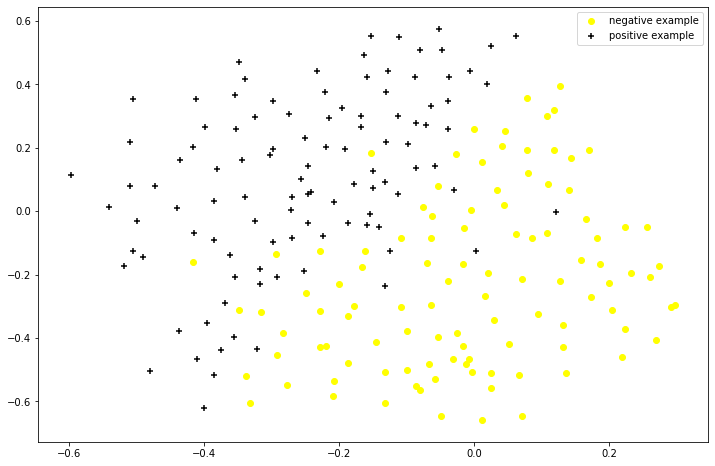

In [189]:
plot_scatter(data3)
plt.show()

寻找最适合的C和sigma

D:\pycharm\pro\test\venv\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No contour levels were found within the data range.
  


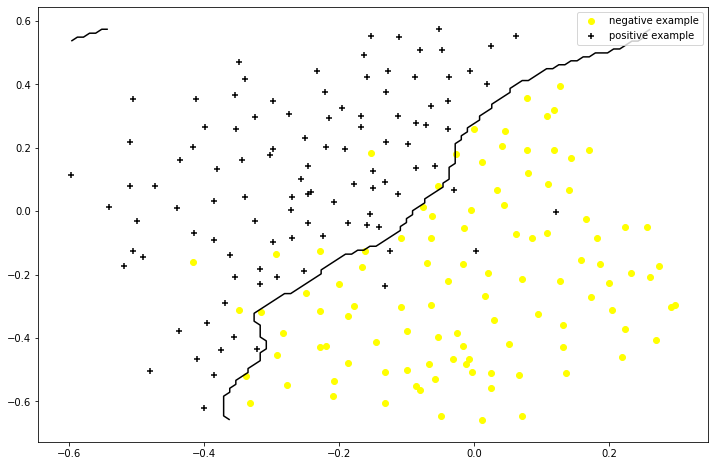

In [190]:
C_range = np.array([0.01,0.03,0.1,0.3,1,3,10,30, 100])
sigma_range = np.array([0.01,0.03,0.1,0.3,1,3,10,30, 100])
final_score = 0
C_final = 0
sigma_final = 0
for c in C_range:
    for sigma in sigma_range:
        temp_svc = svm.SVC(C= c, gamma= sigma, probability=True)
        temp_svc.fit(data3[['X1', 'X2']], data3['Y'])
        score = temp_svc.score(data3_origin['Xval'], data3_origin['yval'])
        if  score > final_score:
            final_score = score
            C_final = c
            sigma_final = sigma

final_svc = svm.SVC(C= C_final, gamma= sigma_final, probability=True)
final_svc.fit(data3[['X1', 'X2']], data3['Y'])
plot_boundary(final_svc, data3)
